# Problem Statement
- A sizable department has to be maintained, for the purposes of recruiting new talent
- More often than not, the new employees have to be trained for the job and/or given time toacclimatize themselves to the company
- Hence, the management has contracted an HR analytics firm to understand what factors theyshould focus on, in order to curb attrition.
- In other words, they want to know what changes they should make to their workplace, in order toget most of their employees to stay.
- Also, they want to know which of these variables is most important and needs to be addressedright away.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from scipy.stats import mannwhitneyu, ttest_ind, pearsonr

In [2]:
df = pd.read_csv('general_data.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


# Droping null and duplicated values from the dataset

In [3]:
display(df.duplicated())
display(df.isnull().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [4]:
df.drop_duplicates()
df.dropna(inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   object 
 2   BusinessTravel           4382 non-null   object 
 3   Department               4382 non-null   object 
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   object 
 7   EmployeeCount            4382 non-null   int64  
 8   EmployeeID               4382 non-null   int64  
 9   Gender                   4382 non-null   object 
 10  JobLevel                 4382 non-null   int64  
 11  JobRole                  4382 non-null   object 
 12  MaritalStatus            4382 non-null   object 
 13  MonthlyIncome            4382 non-null   int64  
 14  NumCompaniesWorked      

# Points to be noted In the above data set we have few columns whose mean, median, mode calculations are not required at all, such columns include:
- 8 columns that stores categoorical data.
- Columns that have constant value for each record and doesn't show any variation in the stored data like, 'StandardHours' and 'EmployeeCount' column. 

# Plotting correlation matrix of the dataset

In [6]:
def plotCorr(df_temp):
    x, y = len(df_temp.columns), len(df_temp.columns)
    fig, ax = plt.subplots(figsize=(x, y))
    sns.heatmap(df_temp.corr(), ax = ax, annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')

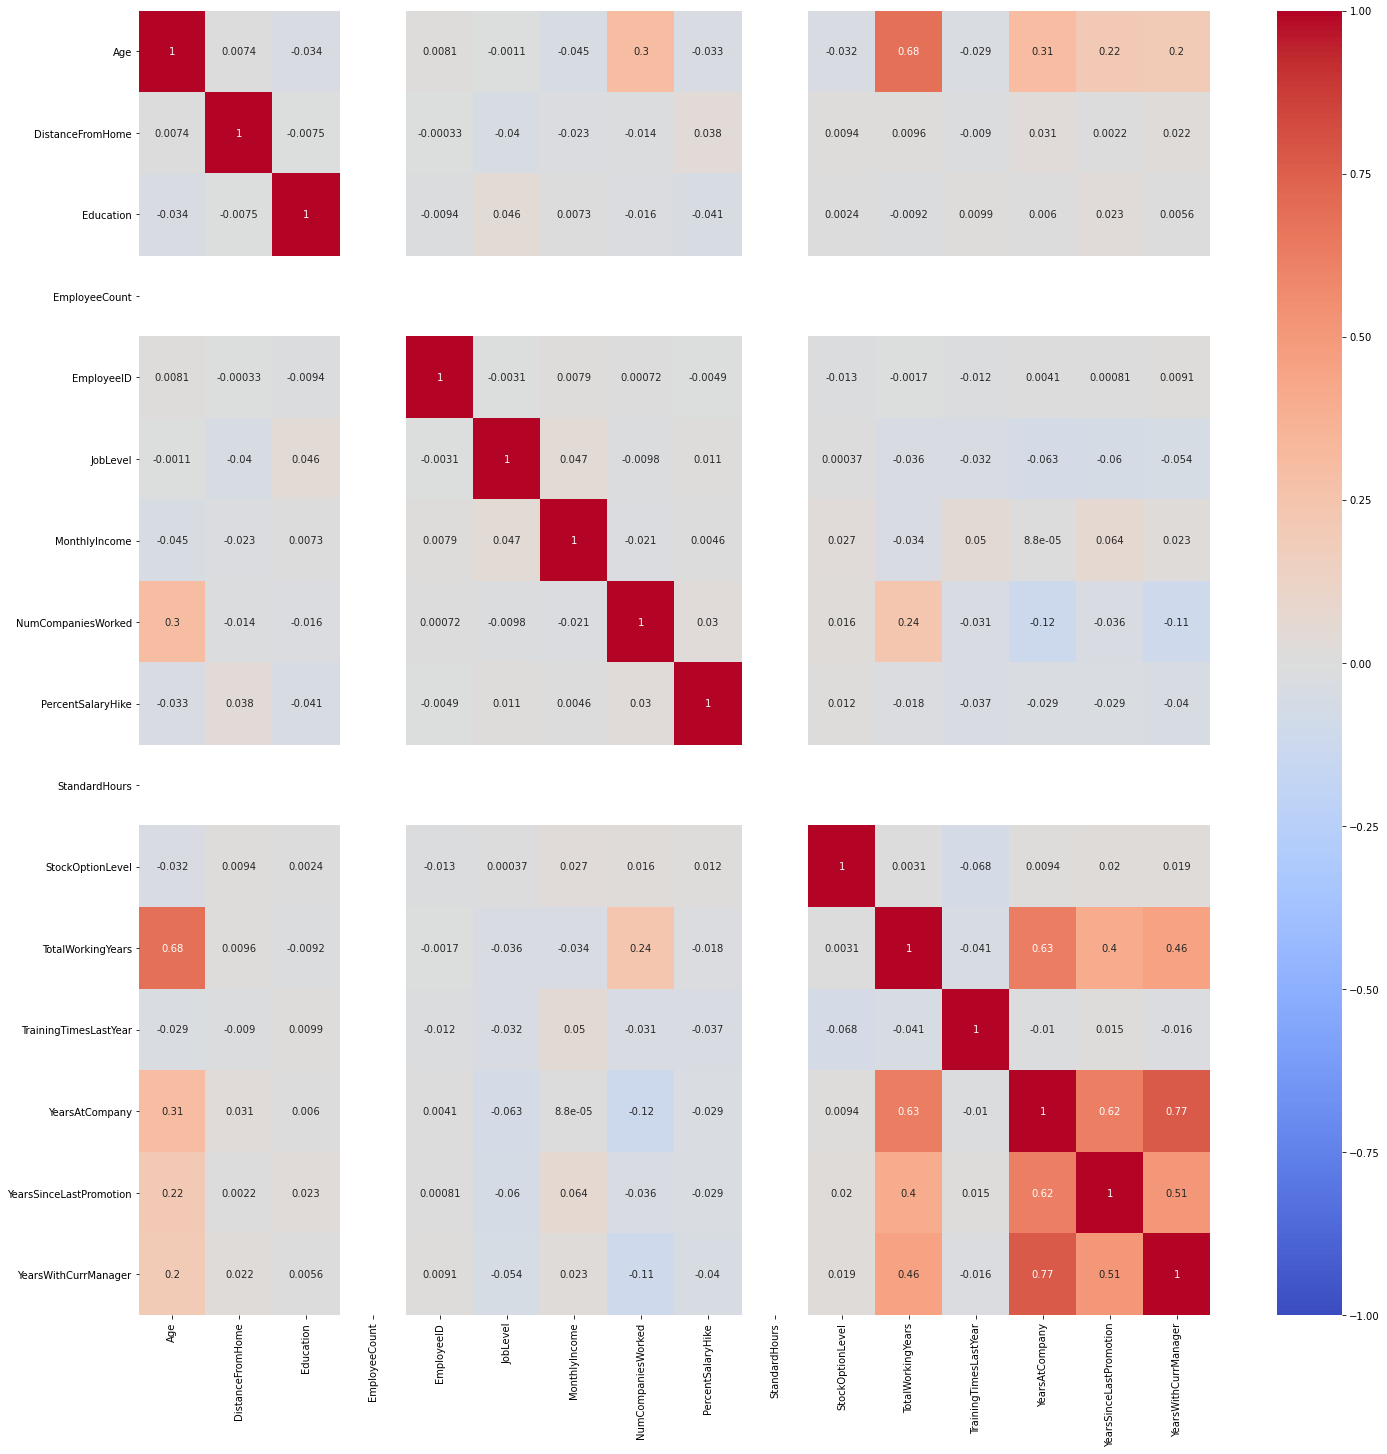

In [7]:
plotCorr(df)

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [9]:
df1 = df[['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
          'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

## Computing mean of specified columns.

In [10]:
mean = df1.mean().to_frame(name = 'Mean')
mean

,Mean
Age,36.933364
DistanceFromHome,9.198996
Education,2.912369
JobLevel,2.063898
MonthlyIncome,65061.702419
NumCompaniesWorked,2.693291
PercentSalaryHike,15.210634
TotalWorkingYears,11.290278
TrainingTimesLastYear,2.798266
YearsAtCompany,7.010497


## Computing median of specified columns.

In [11]:
median = df1.median().to_frame(name = 'Median')
median

,Median
Age,36.0
DistanceFromHome,7.0
Education,3.0
JobLevel,2.0
MonthlyIncome,49190.0
NumCompaniesWorked,2.0
PercentSalaryHike,14.0
TotalWorkingYears,10.0
TrainingTimesLastYear,3.0
YearsAtCompany,5.0


## Computing mode of specified columns.

In [12]:
mode = df1.mode()
mode = mode.T
mode.columns = ['Mode']
mode

,Mode
Age,35.0
DistanceFromHome,2.0
Education,3.0
JobLevel,1.0
MonthlyIncome,23420.0
NumCompaniesWorked,1.0
PercentSalaryHike,11.0
TotalWorkingYears,10.0
TrainingTimesLastYear,2.0
YearsAtCompany,5.0


## Computing variance of specified columns.

In [13]:
variance = df1.var().to_frame(name = 'Variance')
variance

,Variance
Age,8.348974e+01
DistanceFromHome,6.569744e+01
Education,1.050068e+00
JobLevel,1.223490e+00
MonthlyIncome,2.222397e+09
NumCompaniesWorked,6.239165e+00
PercentSalaryHike,1.341762e+01
TotalWorkingYears,6.061739e+01
TrainingTimesLastYear,1.662558e+00
YearsAtCompany,3.756894e+01


## Computing skewness of specified columns.

In [14]:
skew = df1.skew().to_frame(name = 'Skewness')
skew

,Skewness
Age,0.413048
DistanceFromHome,0.955517
Education,-0.288977
JobLevel,1.021797
MonthlyIncome,1.367457
NumCompaniesWorked,1.029174
PercentSalaryHike,0.819510
TotalWorkingYears,1.115419
TrainingTimesLastYear,0.551818
YearsAtCompany,1.764619


## Computing standard deviation of specified columns.

In [15]:
stddev = df1.std().to_frame(name = 'Std. Deviation')
stddev

,Std. Deviation
Age,9.137272
DistanceFromHome,8.105396
Education,1.024728
JobLevel,1.106115
MonthlyIncome,47142.310175
NumCompaniesWorked,2.497832
PercentSalaryHike,3.663007
TotalWorkingYears,7.785717
TrainingTimesLastYear,1.289402
YearsAtCompany,6.129351


## Computing kurtosis of specified columns.

In [16]:
kurtosis = df1.kurt().to_frame(name = 'Kurtosis')
kurtosis

,Kurtosis
Age,-0.409517
DistanceFromHome,-0.230691
Education,-0.565008
JobLevel,0.388189
MonthlyIncome,0.990836
NumCompaniesWorked,0.014307
PercentSalaryHike,-0.306951
TotalWorkingYears,0.909316
TrainingTimesLastYear,0.494215
YearsAtCompany,3.930726


## Computing IQR of specified columns.

In [17]:
iqr = (df1.quantile(.75) - df1.quantile(.25)).to_frame(name = 'IQR')
iqr

,IQR
Age,13.0
DistanceFromHome,12.0
Education,2.0
JobLevel,2.0
MonthlyIncome,54680.0
NumCompaniesWorked,3.0
PercentSalaryHike,6.0
TotalWorkingYears,9.0
TrainingTimesLastYear,1.0
YearsAtCompany,6.0


## Analysis Table 

In [18]:
df_inf = pd.concat([mean, median, mode, variance, stddev, iqr, skew, kurtosis], axis = 1)
df_inf

,Mean,Median,Mode,Variance,Std. Deviation,IQR,Skewness,Kurtosis
Age,36.933364,36.0,35.0,8.348974e+01,9.137272,13.0,0.413048,-0.409517
DistanceFromHome,9.198996,7.0,2.0,6.569744e+01,8.105396,12.0,0.955517,-0.230691
Education,2.912369,3.0,3.0,1.050068e+00,1.024728,2.0,-0.288977,-0.565008
JobLevel,2.063898,2.0,1.0,1.223490e+00,1.106115,2.0,1.021797,0.388189
MonthlyIncome,65061.702419,49190.0,23420.0,2.222397e+09,47142.310175,54680.0,1.367457,0.990836
NumCompaniesWorked,2.693291,2.0,1.0,6.239165e+00,2.497832,3.0,1.029174,0.014307
PercentSalaryHike,15.210634,14.0,11.0,1.341762e+01,3.663007,6.0,0.819510,-0.306951
TotalWorkingYears,11.290278,10.0,10.0,6.061739e+01,7.785717,9.0,1.115419,0.909316
TrainingTimesLastYear,2.798266,3.0,2.0,1.662558e+00,1.289402,1.0,0.551818,0.494215
YearsAtCompany,7.010497,5.0,5.0,3.756894e+01,6.129351,6.0,1.764619,3.930726


## Inference of Analysis
- All the above variables show positive skewness; while Age & Mean_distance_from_home are leptokurtic and all other variables are platykurtic.
- The Mean_Monthly_Income’s IQR is at 54K suggesting company wide attrition across all income bands
- Mean age forms a near normal distribution with 13 years of IQR

In [19]:
def plotBox(df_temp):
    fig = plt.figure(figsize=(25,15))
    for i, col in enumerate(df_temp.columns):
        plt.subplot(3, 4, i+1)
        plt.boxplot(df_temp[col])
        plt.title(col)
        
    plt.show()
    
def plotHist(df_temp):
    fig = plt.figure(figsize=(25,15))
    for i, col in enumerate(df_temp.columns):
        plt.subplot(3, 4, i+1)
        plt.hist(df_temp[col])
        plt.title(col)
        
    plt.show()

# Outliers

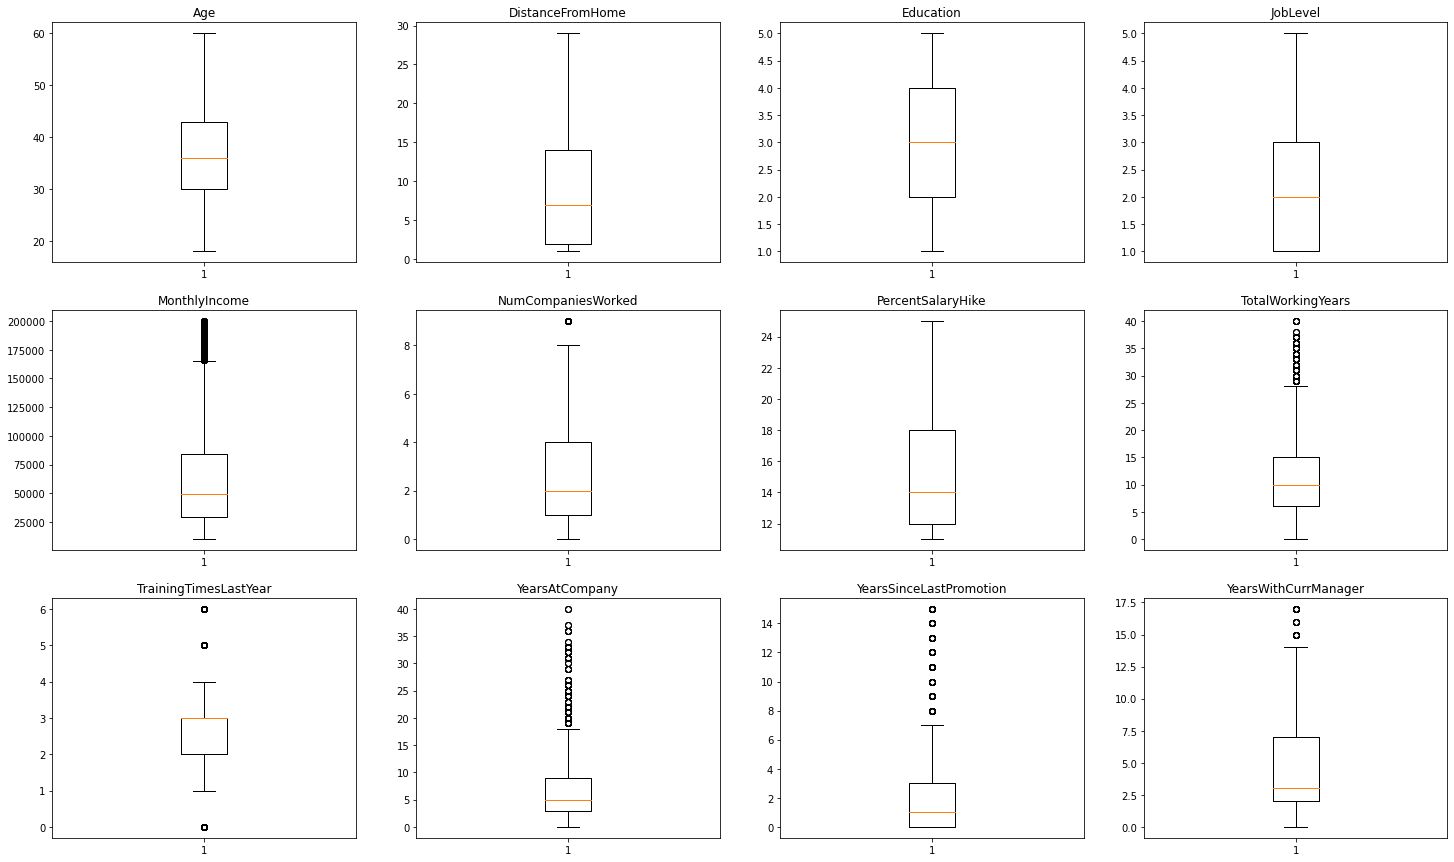

In [20]:
plotBox(df1)

- Age, Education are normally distributed
- DistanceFromHome, JobLevel, PercentSalaryHike are Right Skewed with no outliers
- Rest all the other columns are Right Skewed with several outliers

# Histogram
- These plots gives us the visualization about the data variation and gives an idea of data symmetry and peakness. 

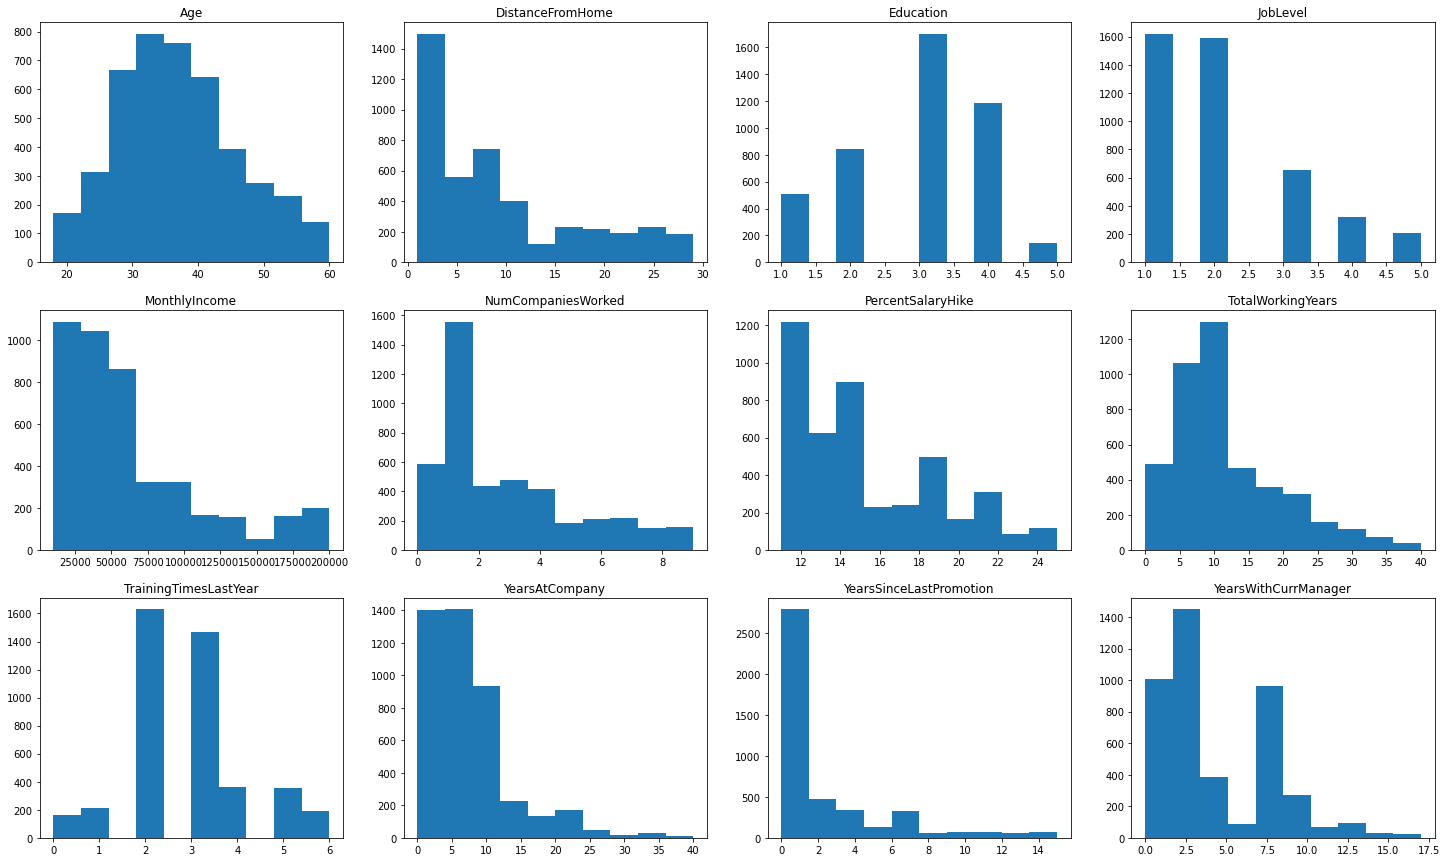

In [21]:
plotHist(df1)

- Age, Education, TrainingTimesLastYear data are symmetric and has its peak in middle. (Mesokurtic)
- Rest of the data are unsymmetric and has it's peak at the left side. (Positively skewed)

# Statistical Tests

In [22]:
df2 = df[['Attrition', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']]
df2

,Attrition,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager
0,No,6,131160,1.0,1,0
1,Yes,10,41890,6.0,5,4
2,No,17,193280,5.0,5,3
3,No,2,83210,13.0,8,5
4,No,10,23420,9.0,6,4
...,...,...,...,...,...,...
4404,No,4,35390,6.0,6,5
4405,No,5,60290,10.0,3,2
4406,No,2,26790,10.0,3,2
4407,No,25,37020,5.0,4,2


## Separating Datasets for statistical tests

In [23]:
df_attr_yes = df2[df2.Attrition == 'Yes']
df_attr_no = df2[df2.Attrition == 'No']

display(df_attr_yes.head())
display(df_attr_no.head())

,Attrition,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager
1,Yes,10,41890,6.0,5,4
6,Yes,11,58130,5.0,0,0
13,Yes,1,57620,10.0,10,9
28,Yes,1,103330,19.0,1,0
30,Yes,4,68540,5.0,3,2


,Attrition,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager
0,No,6,131160,1.0,1,0
2,No,17,193280,5.0,5,3
3,No,2,83210,13.0,8,5
4,No,10,23420,9.0,6,4
5,No,8,40710,28.0,7,7


In [24]:
def mannWhitneyu(df_temp1, df_temp2):
    for col in df_temp1.columns[1:]:
        print(f'Attrition & {col}')
        stat, p = mannwhitneyu(df_temp1[col], df_temp2[col])
        print(stat, p)
        check(p)

def ttestInd(df_temp1, df_temp2):
    for col in df_temp1.columns[1:]:
        print(f'Attrition & {col}')
        stat, p = ttest_ind(df_temp2[col], df_temp1[col])
        print(stat, p)
        check(p)

def Pearsonr(df_temp1):
    df_temp = df2.copy()
    df_temp.Attrition.replace(to_replace = ('No','Yes'),value = (0,1),inplace = True)
    for col in df2.columns[1:]:
        print(f'Attrition & {col}')
        stat, p = pearsonr(df_temp['Attrition'], df_temp1[col])
        print(stat, p)
        check(p)

def check(p):
        if p < 0.05:
            print(f'As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted\n')
        else:
            print(f'As the p value is > than 0.05, the H0 is accepted and Ha is rejected\n')

### Mann Whitneyu

In [25]:
print('mannwhitneyu:\n')
mannWhitneyu(df_attr_yes, df_attr_no)

mannwhitneyu:

Attrition & DistanceFromHome
1295261.0 0.488538986087403
As the p value is > than 0.05, the H0 is accepted and Ha is rejected

Attrition & MonthlyIncome
1249573.5 0.06508807631576838
As the p value is > than 0.05, the H0 is accepted and Ha is rejected

Attrition & TotalWorkingYears
895173.5 2.741211827689903e-39
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted

Attrition & YearsAtCompany
912579.0 3.3433144809752036e-36
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted

Attrition & YearsWithCurrManager
945958.5 5.420302388722274e-31
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted



### ttest_ind

In [26]:
print('ttest_ind:\n')
ttestInd(df_attr_yes, df_attr_no)

ttest_ind:

Attrition & DistanceFromHome
0.6253536318706914 0.5317715668047676
As the p value is > than 0.05, the H0 is accepted and Ha is rejected

Attrition & MonthlyIncome
1.9969640177214658 0.0458908627449721
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted

Attrition & TotalWorkingYears
11.39422669317641 1.1645434967153693e-29
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted

Attrition & YearsAtCompany
8.881225486705604 9.476118084889976e-19
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted

Attrition & YearsWithCurrManager
10.362463400192302 7.105369646808081e-25
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted



### Pearsonr

In [27]:
print('pearsonr:\n')
Pearsonr(df2)

pearsonr:

Attrition & DistanceFromHome
-0.009448638515156224 0.5317715668019558
As the p value is > than 0.05, the H0 is accepted and Ha is rejected

Attrition & MonthlyIncome
-0.030160293808460605 0.045890862744719166
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted

Attrition & TotalWorkingYears
-0.1696699168472389 1.1645434967097149e-29
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted

Attrition & YearsAtCompany
-0.13300261842521507 9.476118084843037e-19
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted

Attrition & YearsWithCurrManager
-0.1546915369028727 7.105369646771178e-25
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted



# Encoding
Our objective was to find out the factors which need to be control to curb the attrition of employee's, as the Attrition is a categorical variable it's needed to be encoded so as to proceed with further analysis

In [28]:
df3 = df.copy()
df3.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

## Label encoding
- Lable encoding simply assign numeric values to different categories starting from 0.

In [29]:
enc = LabelEncoder()

In [30]:
def encode(cols):
    for col in cols:
        df3[col] = enc.fit_transform(df3[col])

In [31]:
encode(df3.select_dtypes(include=['object']).columns)
df3.dtypes

Age                          int64
Attrition                    int32
BusinessTravel               int32
Department                   int32
DistanceFromHome             int64
Education                    int64
EducationField               int32
EmployeeCount                int64
EmployeeID                   int64
Gender                       int32
JobLevel                     int64
JobRole                      int32
MaritalStatus                int32
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                       int32
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

#### Droping columns that have constant value

In [32]:
def dropCol(df_temp):
    for col in df_temp.columns:
        if len(df_temp[col].unique()) == 1:
            print(col, ': ', df_temp[col].unique())
            df_temp.drop(col, axis = 1, inplace = True)
    return df_temp

In [33]:
df3 = dropCol(df3)
df3.columns

EmployeeCount :  [1]
Over18 :  [0]
StandardHours :  [8]


Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

####  Correlation Matrix

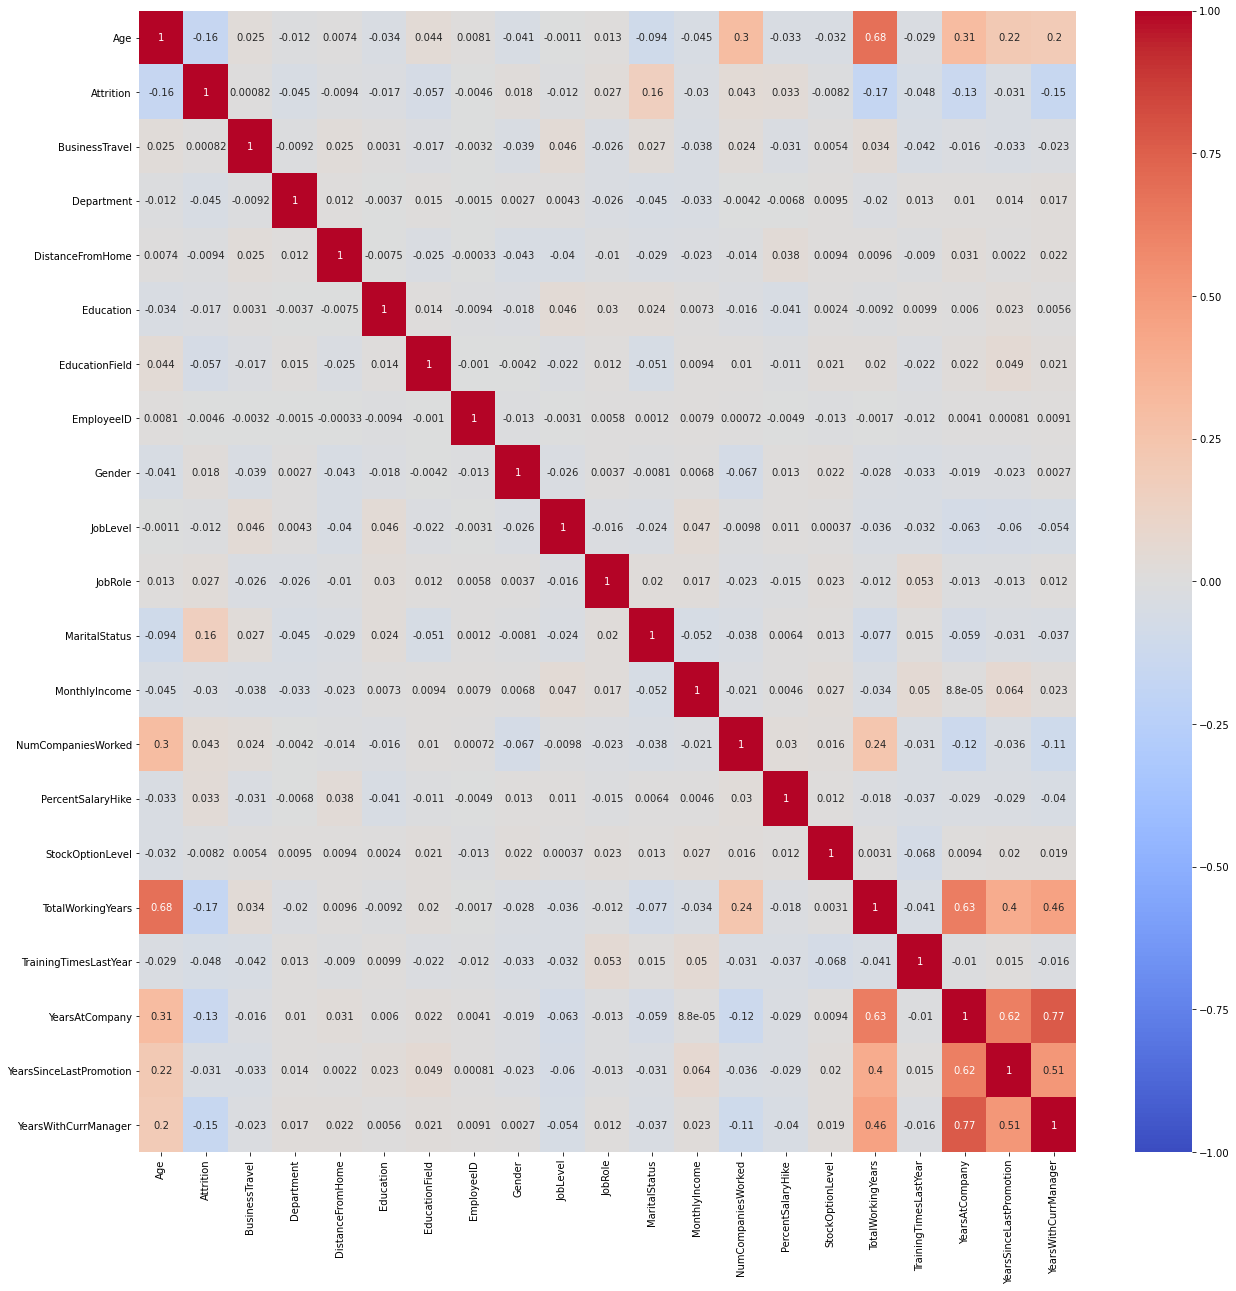

In [34]:
plotCorr(df3)

###  Inference:
- The above heat map shows that Attrition has weak positive correlation with PercentSalaryHike, NumCompaniesWorked and a strong positive correlation with MaritalStatus.
- Also,strong negative correlation of Attrition with Age, YearsAtCompany, YearsWithCurrManager and TotalWorkingYears exist.
- Moreover, these results shows the correlation and dependency of Attrition with other fields as a whole but our objective was to sort out and check the dependency of various fields with Attrition='Yes', for this we have to perform one-hot encoding. 

## One-hot encoding of all the categorical columns
- It is the most popular encoding that is opted for categorical columns, basically it introduces seperate columns for each category in the dataframe and assign values to all the records as 1 when record falls in that particular category and else as 0.

In [35]:
df4 = df.copy()
df_dummy = pd.get_dummies(df4, columns=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole',
                                             'MaritalStatus','Over18'])
df_dummy.head()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,51,6,2,1,1,1,131160,1.0,11,8,...,0,0,0,0,0,0,0,1,0,1
1,31,10,1,1,2,1,41890,0.0,23,8,...,0,0,0,1,0,0,0,0,1,1
2,32,17,4,1,3,4,193280,1.0,15,8,...,0,0,0,0,1,0,0,1,0,1
3,38,2,5,1,4,3,83210,3.0,11,8,...,0,0,0,0,0,0,0,1,0,1
4,32,10,1,1,5,1,23420,4.0,12,8,...,0,0,0,0,1,0,0,0,1,1


In [36]:
df_dummy.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_No', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Dire

### Displaying Detailed information of the Dataset

In [37]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4382 non-null   int64  
 1   DistanceFromHome                   4382 non-null   int64  
 2   Education                          4382 non-null   int64  
 3   EmployeeCount                      4382 non-null   int64  
 4   EmployeeID                         4382 non-null   int64  
 5   JobLevel                           4382 non-null   int64  
 6   MonthlyIncome                      4382 non-null   int64  
 7   NumCompaniesWorked                 4382 non-null   float64
 8   PercentSalaryHike                  4382 non-null   int64  
 9   StandardHours                      4382 non-null   int64  
 10  StockOptionLevel                   4382 non-null   int64  
 11  TotalWorkingYears                  4382 non-null   float

### Droping columns that have constant value

In [38]:
df4 = dropCol(df_dummy)
df4.columns

EmployeeCount :  [1]
StandardHours :  [8]
Over18_Y :  [1]


Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_No', 'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist

# Scaling

Since, the dataset has a wide range of values in each column, thus scaling is needed to be performed so as to compress each data in a range of 0 to 1 and to ensure this a MinMaxScaler is used.


## MinMax Scaling

In [39]:
min_max_scaler = MinMaxScaler()

In [40]:
df5 = pd.DataFrame(min_max_scaler.fit_transform(df4))

### After MinMax scaling the dataframe loses it's column names, so here we will regenerate the column names using the original dataframe. 

In [41]:
df5.columns

RangeIndex(start=0, stop=42, step=1)

### Corresponding obtained dataset

In [42]:
df5.columns = df4.columns
df5.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_No', 'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist

### Correlation matrix

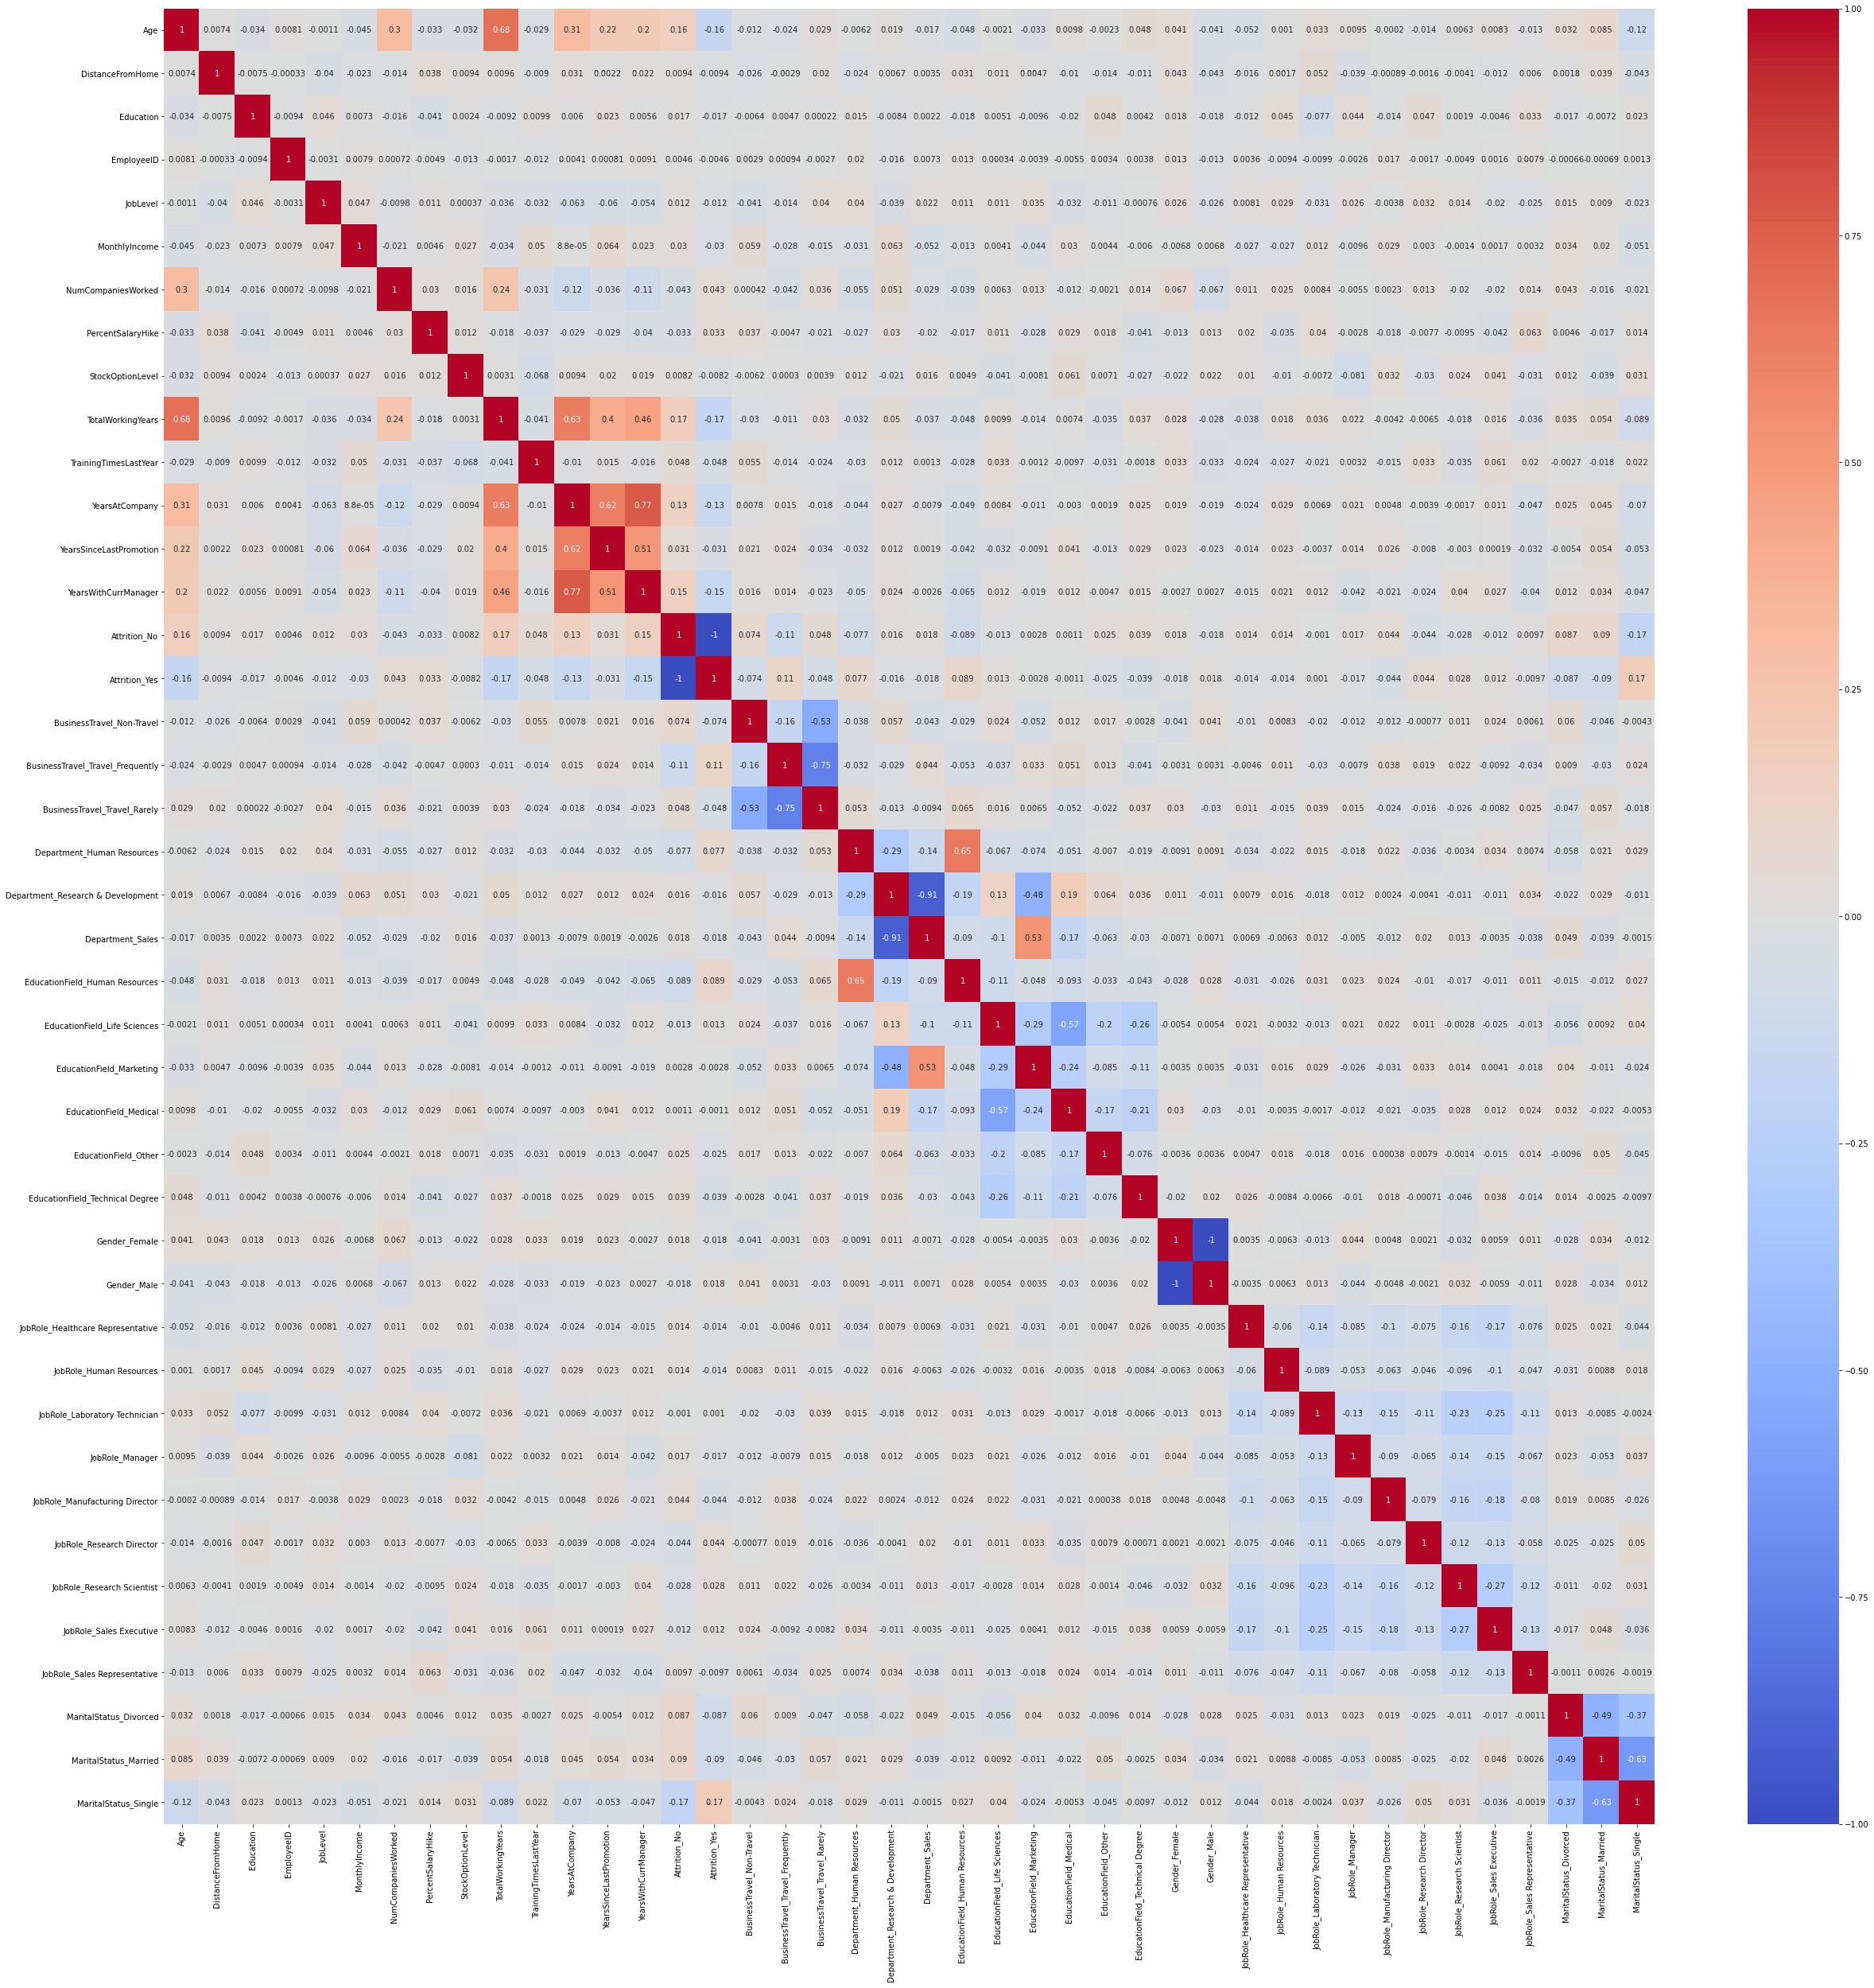

In [43]:
plotCorr(df5)

# Final Inferences:
> When Attrition is 'Yes'
- Strong positive correlation exist for MaritalStatus_Single which means that employees who are single leaves the XYZ company more often. 
- Strong positive correlation exist for BusinessTravel_Travel_Frequently which means that employees who are made to travel frequently leaves the XYZ company more often. 
- Positive correlation exist for EducationField_Human Resources which means employee with educational background in Human Resources tends to leave XYZ company more often. 
- Positive correlation exist for Department_Human Resources which means employee in Human Resources department tends to leave XYZ company more often, also same can be inferred from point 3 as well.
- Strong negative correlation exist for TotalWorkingYears which means that employees who have less number of total working years or experience leaves the XYZ company more often.
- Strong negative and equal correlation exist for Age and YearsWithCurrManager which means that younger employees and employees with less experience with current manager tend to leave the XYZ company more often. 
- Strong negative correlation exist for YearsAtCompany which means that employees who have spent less number of years in company leaves the XYZ company more often. 

# Conclusion:
From the above obtained inferences based on the final heatmap it's clear that Company XYZ lags behind in serving their new employees and must draft some good policies for the employees that are young, unmarried and have just joined the aforesaid organization. Apart from that the main focus of the company should be on the Human Resource department as this department contributes for maximum attrition of the employees, discussion could be done with the employees at all levels of the department so as to understand and rectify the problems they are facing in a better way. Employees with frequent business travel history must be taken care of either by giving them some sort of emoluments or a means of good travel comforts needed to be provided as per their demands. So, Attrition in XYZ Company can be controlled by following above mentioned small measures and that may lead to the overall growth of the organization. 